In [4]:
#from bitstring import BitArray
minus =  0b0 #BitArray('0b01') # 1
plus = 0b1 #BitArray('0b10') # 2
zero = 0b00 #BitArray('0b00') # 0

def encode_dm(source, scale, threshold):

    stream = []
    L = (len(source)+scale-1) // scale
    cur = 0
    #print(L)
    for i in range(L-1):
        dif = source[i*scale] - cur#source[i*scale]
        #print(dif)
        if dif > 0:#threshold:
            stream.append(plus)
            cur += threshold
            #print(dif)
        elif dif < 0:#-threshold:
            stream.append(minus)
            cur -= threshold
        else:
            print("hoge")
            
    #print("plus:{}".format(stream.count(plus)))
    #print("minus:{}".format(stream.count(minus)))
    return bytes(stream)#.tobytes()

In [6]:
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile


wf = "atr503_a06.wav"
fs, data = wavfile.read("../data/wav/{}".format(wf))
data = data.astype(np.float)

SR = 16000
threshold = 1000




scale = fs//SR

stream = encode_dm(source=data, scale=scale, threshold=threshold)
bn, _ = os.path.splitext(wf)
print(bn)

sample_per_part = 10000
number_of_parts = len(data)//sample_per_part
print(number_of_parts)
for num in range(number_of_parts):
    with open("../data/binary/{}_SR{}_threshold{}_part{}".format(num, bn, SR, threshold),"wb") as f:
        f.write(stream[num*sample_per_part : (num+1)*sample_per_part])



y = [0]


fs, data = wavfile.read("../data/wav/atr503_a06.wav")
#plt.plot(data)
    
d = threshold
part = 4
with open("../data/binary/{}_SR{}_threshold{}_part{}".format(part, bn, SR, threshold),"rb") as f:
    for r in f.read():
        bit = r
        #print(bit)
        #for i in range(4):
            #bit = (bits >> (7-i*2)) & 0b11
            #print(bit)
        val = y[-1]
        if bit == minus:
            val -=d
            
        elif bit == plus:
            val +=d
        elif bit == zero:
            pass
        else:
            print("hoge")
        for i in range(scale):
            y.append(val)
# def f(l):
#     if abs(l) > 1500: 
#         return(l)
#     else: 
#         return(0)
# y = list(map(lambda l: f(l), y))
#plt.plot(y)
#         bit = r
#         #print(bit)
#         #for i in range(4):
#             #bit = (bits >> (7-i*2)) & 0b11
#             #print(bit)
#         if bit == minus:
#             y.append(y[-1]-10)
#         elif bit == plus:
#             y.append(y[-1]+10)
#         elif bit == zero:
#             y.append(y[-1])
#         else:
#             print("hoge")
#plt.hold(False)
plt.plot(y)
#plt.xlim(45000, 45100)

if not os.path.exists("../data/result"):
    os.mkdir("../data/result") 
    
wavfile.write("../data/result/{}".format(wf), fs, np.array(y).astype(np.int16))

NameError: name 'np' is not defined

In [ ]:
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile


wf = "atr503_a06.wav"
fs, data = wavfile.read("../data/wav/{}".format(wf))
data = data.astype(np.float)

SR = 16000
threshold = 1000

scale = fs//SR

sample_per_part = 1000
number_of_parts = len(data)//sample_per_part

for num in range(number_of_parts):
    stream = encode_dm(source=data[num*sample_per_part : (num+1)*sample_per_part], scale=scale, threshold=threshold)
    bn, _ = os.path.splitext(wf)
    #print(bn)

    with open("../data/binary/{}part{}_SR{}_threshold{}".format(num, bn, SR, threshold),"wb") as f:
        f.write(stream)

y = [0]
    
d = threshold
with open("../data/binary/{}part{}_SR{}_threshold{}".format(5, bn, SR, threshold),"rb") as f:
    for r in f.read():
        bit = r
        #print(bit)
        #for i in range(4):
            #bit = (bits >> (7-i*2)) & 0b11
            #print(bit)
        val = y[-1]
        if bit == minus:
            val -=d
            
        elif bit == plus:
            val +=d
        elif bit == zero:
            pass
        else:
            print("hoge")
        for i in range(scale):
            y.append(val)
# def f(l):
#     if abs(l) > 1500: 
#         return(l)
#     else: 
#         return(0)
# y = list(map(lambda l: f(l), y))
#plt.plot(y)
#         bit = r
#         #print(bit)
#         #for i in range(4):
#             #bit = (bits >> (7-i*2)) & 0b11
#             #print(bit)
#         if bit == minus:
#             y.append(y[-1]-10)
#         elif bit == plus:
#             y.append(y[-1]+10)
#         elif bit == zero:
#             y.append(y[-1])
#         else:
#             print("hoge")
#plt.hold(False)
plt.plot(y)
#plt.xlim(45000, 45100)

if not os.path.exists("../data/result"):
    os.mkdir("../data/result") 
    
wavfile.write("../data/result/{}".format(wf), fs, np.array(y).astype(np.int16))

(19000.0, 19100.0)

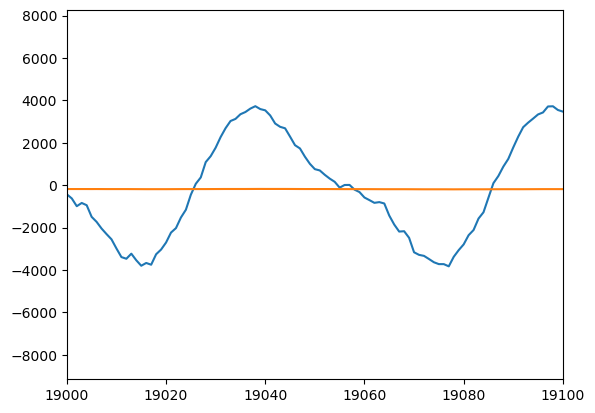

In [278]:
import scipy.io.wavfile as wavfile
import os

if not os.path.exists("../data/binary"):
    os.mkdir("../data/binary") 
    
wavlist = os.listdir("../data/wav")
for wf in wavlist:
    print("file: {}".format(wf))        
    fs, data = wavfile.read("../data/wav/{}".format(wf))
    data = data.astype(np.float)

    SR = 16000
    threshold = 1000

    scale = fs//SR

    stream = encode_dm(source=data, scale=scale, threshold=threshold)
    bn, _ = os.path.splitext(wf)
    
    sample_per_part = 10000
    number_of_parts = len(data)//sample_per_part
    for num in range(number_of_parts):
        with open("../data/binary/{}_SR{}_threshold{}_part{}".format(num, bn, SR, threshold),"wb") as f:
            f.write(stream[num*sample_per_part : (num+1)*sample_per_part])




file: atr503_a39.wav
file: atr503_a26.wav
file: atr503_a32.wav
file: atr503_a10.wav


/tmp/ipykernel_106763/2818676724.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = data.astype(np.float)


file: atr503_a08.wav
file: atr503_a34.wav
file: atr503_a30.wav
file: atr503_a16.wav
file: atr503_a27.wav
file: atr503_a49.wav
file: atr503_a02.wav
file: atr503_a36.wav
file: atr503_a15.wav
file: atr503_a13.wav
file: atr503_a03.wav
file: atr503_a45.wav
file: atr503_a04.wav
file: atr503_a43.wav
file: atr503_a40.wav
file: atr503_a50.wav
file: atr503_a22.wav
file: atr503_a23.wav
file: atr503_a48.wav
file: atr503_a47.wav
file: atr503_a09.wav
file: atr503_a20.wav
file: atr503_a05.wav
file: atr503_a41.wav
file: atr503_a17.wav
file: atr503_a19.wav
file: atr503_a11.wav
file: atr503_a33.wav
file: atr503_a14.wav
file: atr503_a44.wav
file: atr503_a29.wav
file: atr503_a37.wav
file: atr503_a42.wav
file: atr503_a18.wav
file: atr503_a01.wav
file: atr503_a24.wav
file: atr503_a38.wav
file: atr503_a07.wav
file: atr503_a35.wav
file: atr503_a28.wav
file: atr503_a21.wav
file: atr503_a25.wav
file: atr503_a31.wav
file: atr503_a12.wav
file: atr503_a46.wav
file: atr503_a06.wav


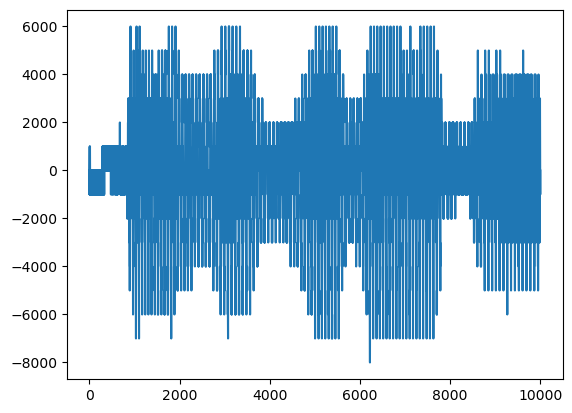

In [2]:
from scipy.interpolate import UnivariateSpline
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile


y = [0]


#fs, data = wavfile.read("../data/wav/atr503_a06.wav")
#plt.plot(data)
    
wf = "atr503_a06.wav"
fs, _ = wavfile.read("../data/wav/{}".format(wf))
bn, _ = os.path.splitext(wf)

SR = int(os.environ.get('SR', '16000'))
threshold = int(os.environ.get('THRESHOLD', '1000'))
sample_per_part = int(os.environ.get('SAMPLE_PER_PART', '10000'))
minus = os.environ.get('MINUS', '0').lower() in ('true', '1', 't')
plus = os.environ.get('PLUS', '1').lower() in ('true', '1', 't')

scale = fs//SR


d = threshold
part = 4
with open("../data/binary/{}_SR{}_threshold{}_part{}".format(bn, SR, threshold, part),"rb") as f:
    for r in f.read():
        bit = r
        #print(bit)
        #for i in range(4):
            #bit = (bits >> (7-i*2)) & 0b11
            #print(bit)
        val = y[-1]
        if bit == minus:
            val -=d
            
        elif bit == plus:
            val +=d
        elif bit == zero:
            pass
        else:
            print("hoge")
        for i in range(scale):
            y.append(val)
plt.plot(y)


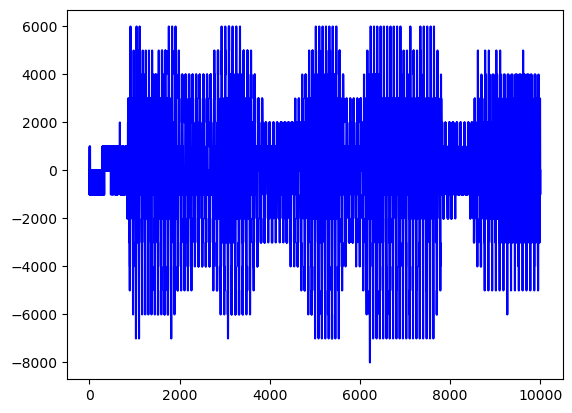

In [3]:
x = np.arange(len(y))
spl = UnivariateSpline(x, y)

plt.plot(x, spl(x), 'b')

plt.show()